### 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

### 2. Primary and secondary outcomes



#### 1 year patient survival

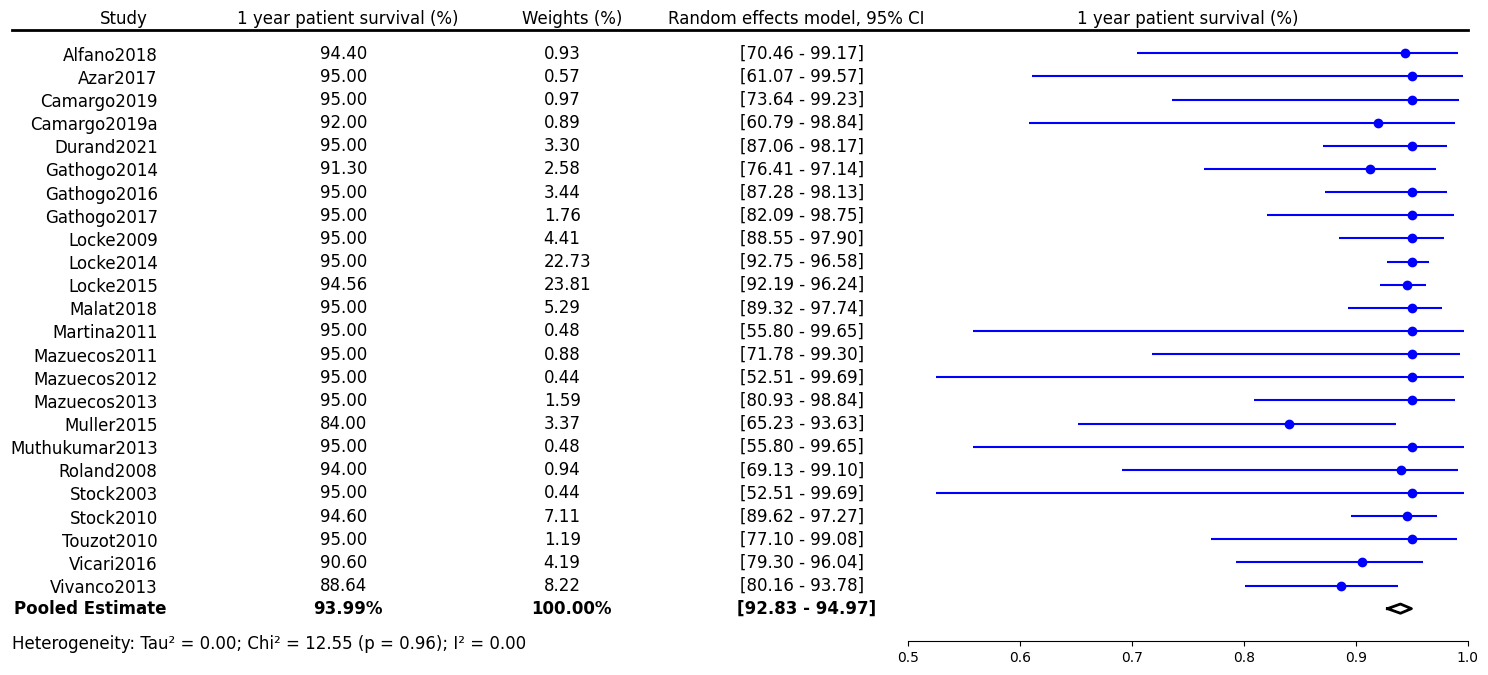

<Figure size 640x480 with 0 Axes>

In [187]:
# Load the JSON data
with open("/mnt/d/pydatascience/hiv_txp_sr/results/1_yr_pt_survival.json", 'r') as f:
    data = json.load(f)

# Extract the necessary data for the forest plot
combined_results = data['combined_results']

studies = [result['study_id'] for result in combined_results[:-1]]  # Exclude 'Pooled Estimate'
effect_sizes = [result['effect_size'] for result in combined_results[:-1]]
lower_ci = [result['ci_lb'] for result in combined_results[:-1]]
upper_ci = [result['ci_ub'] for result in combined_results[:-1]]
weights = [result['weight_percent'] for result in combined_results[:-1]]

# Get the combined OR for the pooled estimate
combined_OR = combined_results[-1]

# Set figure size
fig, ax = plt.subplots(figsize=(7,8))
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# Define the size of the space on the left for the numeric data and on the right for the forest plot
left_space = 0.1
right_space = 0.9
left_limit = -1  # Negative to provide more space for the left numeric data
right_limit = 1  # Less than 1 to limit the forest plot region on the right

# Customize the plot
ax.errorbar(effect_sizes, np.arange(len(studies)), 
            xerr=[np.array(effect_sizes) - np.array(lower_ci), np.array(upper_ci) - np.array(effect_sizes)], 
            fmt='o', color='blue', label='Effect Sizes')
ax.plot([combined_OR['ci_lb'], combined_OR['effect_size'], combined_OR['ci_ub'], combined_OR['effect_size'], combined_OR['ci_lb']], 
        [len(studies), len(studies) - 0.2, len(studies), len(studies) + 0.2, len(studies)], 'k-', linewidth=2, label='95% CI of Pooled Estimate')

# Customize the plot further
ax.set_xlim([0.5, 1])
ax.set_yticks(np.arange(len(studies)))
ax.get_yaxis().set_tick_params(length=0) 
ax.set_yticklabels(studies,fontsize=12)
ax.yaxis.set_tick_params(pad=540)
ax.invert_yaxis()  # Invert the y-axis to have the first study at the top

# Manually set the axes positions to allow space for the numeric data on the left
pos = ax.get_position()
pos.x0 = left_space
pos.x1 = right_space  
ax.set_position(pos)

# # Annotations and labels
ax.text(-0.2, -1.5, "Study", va='center', ha='center', fontsize=12)
ax.text(0.0, - 1.5, "1 year patient survival (%)", va='center', ha='center', fontsize=12)
ax.text(0.2, -1.5, "Weights (%)", va='center', ha='center', fontsize=12)
ax.text(0.4, -1.5, "Random effects model, 95% CI", va='center', ha='center', fontsize=12)
ax.text(0.75, -1.5, "1 year patient survival (%)", va='center', ha='center', fontsize=12)

# Annotations and labels for study names, events, and weights
for i, study in enumerate(studies):
    ax.text(-1.05, i, f"{effect_sizes[i] * 100:.2f}", verticalalignment='center', horizontalalignment='left', fontsize=12, transform=ax.get_yaxis_transform())
    ax.text(-0.65, i, f"{weights[i]:.2f}", verticalalignment='center', horizontalalignment='left', fontsize=12, transform=ax.get_yaxis_transform())
    ax.text(-0.3, i, f"[{lower_ci[i] * 100:.2f} - {upper_ci[i] * 100:.2f}]", verticalalignment='center', horizontalalignment='left', fontsize=12, transform=ax.get_yaxis_transform())

# Add numeric data of the combined effect
ax.text(-0.23, len(studies), "Pooled Estimate", va='center', ha='center', fontsize=12, fontweight='bold')
ax.text(0, len(studies), f"{combined_OR['effect_size'] * 100:.2f}%", va='center', ha='center', fontsize=12, fontweight='bold')
ax.text(0.2, len(studies), f"{combined_OR['weight_percent']:.2f}%", va='center', ha='center', fontsize=12, fontweight='bold')
ax.text(0.41, len(studies), f"[{combined_OR['ci_lb'] * 100:.2f} - {combined_OR['ci_ub']* 100:.2f}]", va='center', ha='center', fontsize=12, fontweight='bold')

# Add annotation of Heterogeneity, overall effect
ax.text(-0.3, len(studies) + 1.5, f"Heterogeneity: Tau² = {data['tau2']:.2f}; Chi² = {data['Q']:.2f} (p = {data['p_value_for_Q']:.2f}); I² = {data['I2']:.2f}", va='center', ha='left', fontsize=12)
# ax.text(-0.2, 5, f"Test for overall effect: Z = {summary_df['Value'].iloc[5]} (p = {summary_df['Value'].iloc[6]})", va='center', ha='left', fontsize=12)

# Draw the long horizontal line
axhline = plt.axhline(y=-1, color='black', linestyle='-', lw=2)
axhline.set_clip_on(False)
axhline.set_xdata([left_limit - 0.6, right_limit])

# Show the plot
plt.show()
plt.savefig('/mnt/d/pydatascience/hiv_txp_sr/results/1_yr_pt_survival.png', dpi=1000)


#### 3 year patient survival

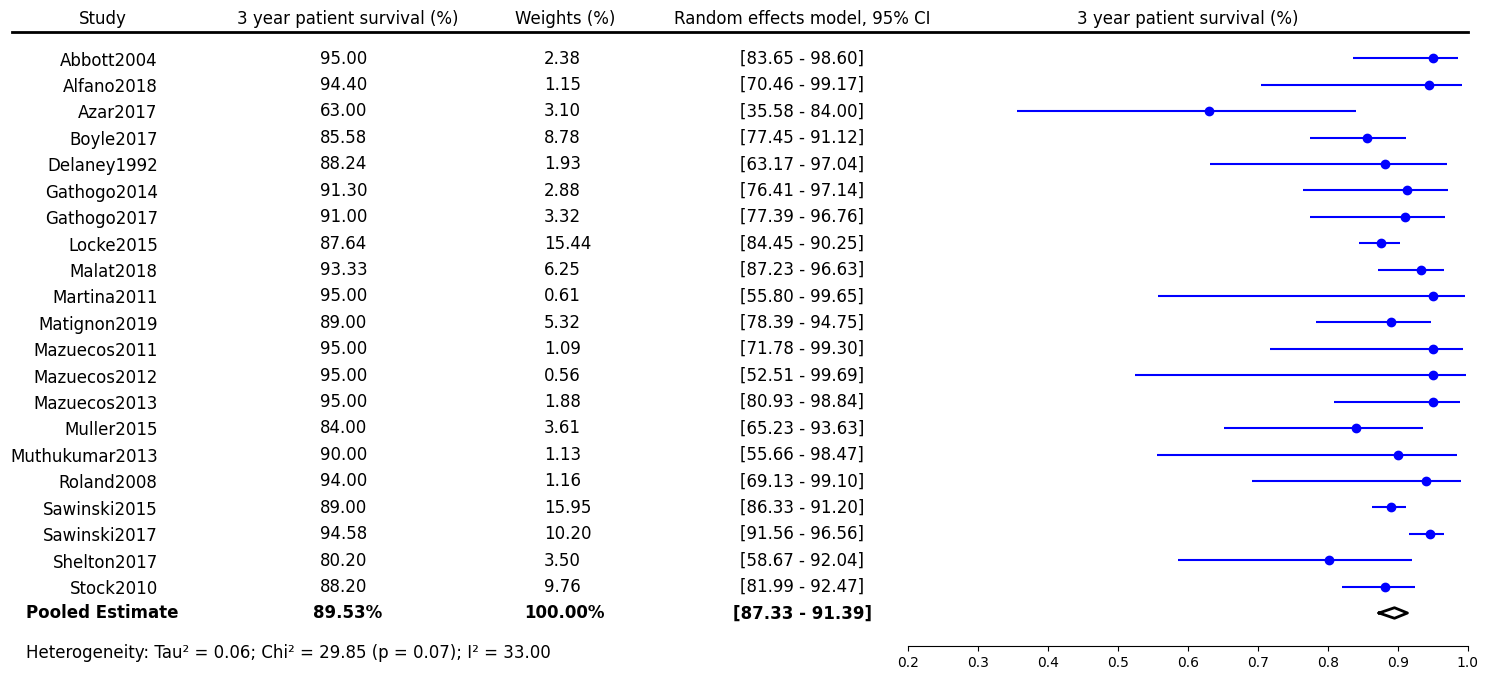

<Figure size 640x480 with 0 Axes>

In [222]:
# Load the JSON data
with open("/mnt/d/pydatascience/hiv_txp_sr/results/3_yr_pt_survival.json", 'r') as f:
    data = json.load(f)

# Extract the necessary data for the forest plot
combined_results = data['combined_results']

studies = [result['study_id'] for result in combined_results[:-1]]  # Exclude 'Pooled Estimate'
effect_sizes = [result['effect_size'] for result in combined_results[:-1]]
lower_ci = [result['ci_lb'] for result in combined_results[:-1]]
upper_ci = [result['ci_ub'] for result in combined_results[:-1]]
weights = [result['weight_percent'] for result in combined_results[:-1]]

# Get the combined OR for the pooled estimate
combined_OR = combined_results[-1]

# Set figure size
fig, ax = plt.subplots(figsize=(7,8))
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# Define the size of the space on the left for the numeric data and on the right for the forest plot
left_space = 0.1
right_space = 0.9
left_limit = -1  # Negative to provide more space for the left numeric data
right_limit = 1  # Less than 1 to limit the forest plot region on the right

# Customize the plot
ax.errorbar(effect_sizes, np.arange(len(studies)), 
            xerr=[np.array(effect_sizes) - np.array(lower_ci), np.array(upper_ci) - np.array(effect_sizes)], 
            fmt='o', color='blue', label='Effect Sizes')
ax.plot([combined_OR['ci_lb'], combined_OR['effect_size'], combined_OR['ci_ub'], combined_OR['effect_size'], combined_OR['ci_lb']], 
        [len(studies), len(studies) - 0.2, len(studies), len(studies) + 0.2, len(studies)], 'k-', linewidth=2, label='95% CI of Pooled Estimate')

# Customize the plot further
ax.set_xlim([0.2, 1])
ax.set_yticks(np.arange(len(studies)))
ax.get_yaxis().set_tick_params(length=0) 
ax.set_yticklabels(studies,fontsize=12)
ax.yaxis.set_tick_params(pad=540)
ax.invert_yaxis()  # Invert the y-axis to have the first study at the top

# Manually set the axes positions to allow space for the numeric data on the left
pos = ax.get_position()
pos.x0 = left_space
pos.x1 = right_space  
ax.set_position(pos)

# # Annotations and labels
ax.text(-0.95, -1.5, "Study", va='center', ha='center', fontsize=12)
ax.text(-0.6, - 1.5, "3 year patient survival (%)", va='center', ha='center', fontsize=12)
ax.text(-0.29, -1.5, "Weights (%)", va='center', ha='center', fontsize=12)
ax.text(0.05, -1.5, "Random effects model, 95% CI", va='center', ha='center', fontsize=12)
ax.text(0.6, -1.5, "3 year patient survival (%)", va='center', ha='center', fontsize=12)

# Annotations and labels for study names, events, and weights
for i, study in enumerate(studies):
    ax.text(-1.05, i, f"{effect_sizes[i] * 100:.2f}", verticalalignment='center', horizontalalignment='left', fontsize=12, transform=ax.get_yaxis_transform())
    ax.text(-0.65, i, f"{weights[i]:.2f}", verticalalignment='center', horizontalalignment='left', fontsize=12, transform=ax.get_yaxis_transform())
    ax.text(-0.3, i, f"[{lower_ci[i] * 100:.2f} - {upper_ci[i] * 100:.2f}]", verticalalignment='center', horizontalalignment='left', fontsize=12, transform=ax.get_yaxis_transform())

# Add numeric data of the combined effect
ax.text(-0.95, len(studies), "Pooled Estimate", va='center', ha='center', fontsize=12, fontweight='bold')
ax.text(-0.6, len(studies), f"{combined_OR['effect_size'] * 100:.2f}%", va='center', ha='center', fontsize=12, fontweight='bold')
ax.text(-0.29, len(studies), f"{combined_OR['weight_percent']:.2f}%", va='center', ha='center', fontsize=12, fontweight='bold')
ax.text(0.05, len(studies), f"[{combined_OR['ci_lb'] * 100:.2f} - {combined_OR['ci_ub']* 100:.2f}]", va='center', ha='center', fontsize=12, fontweight='bold')

# Add annotation of Heterogeneity, overall effect
ax.text(-1.06, len(studies) + 1.5, f"Heterogeneity: Tau² = {data['tau2']:.2f}; Chi² = {data['Q']:.2f} (p = {data['p_value_for_Q']:.2f}); I² = {data['I2']:.2f}", va='center', ha='left', fontsize=12)
# ax.text(-0.2, 5, f"Test for overall effect: Z = {summary_df['Value'].iloc[5]} (p = {summary_df['Value'].iloc[6]})", va='center', ha='left', fontsize=12)

# Draw the long horizontal line
axhline = plt.axhline(y=-1, color='black', linestyle='-', lw=2)
axhline.set_clip_on(False)
axhline.set_xdata([left_limit - 0.6, right_limit])

# Show the plot
plt.show()
plt.savefig('/mnt/d/pydatascience/hiv_txp_sr/results/3_yr_pt_survival.png', dpi=1000)


#### 5 year patient survival

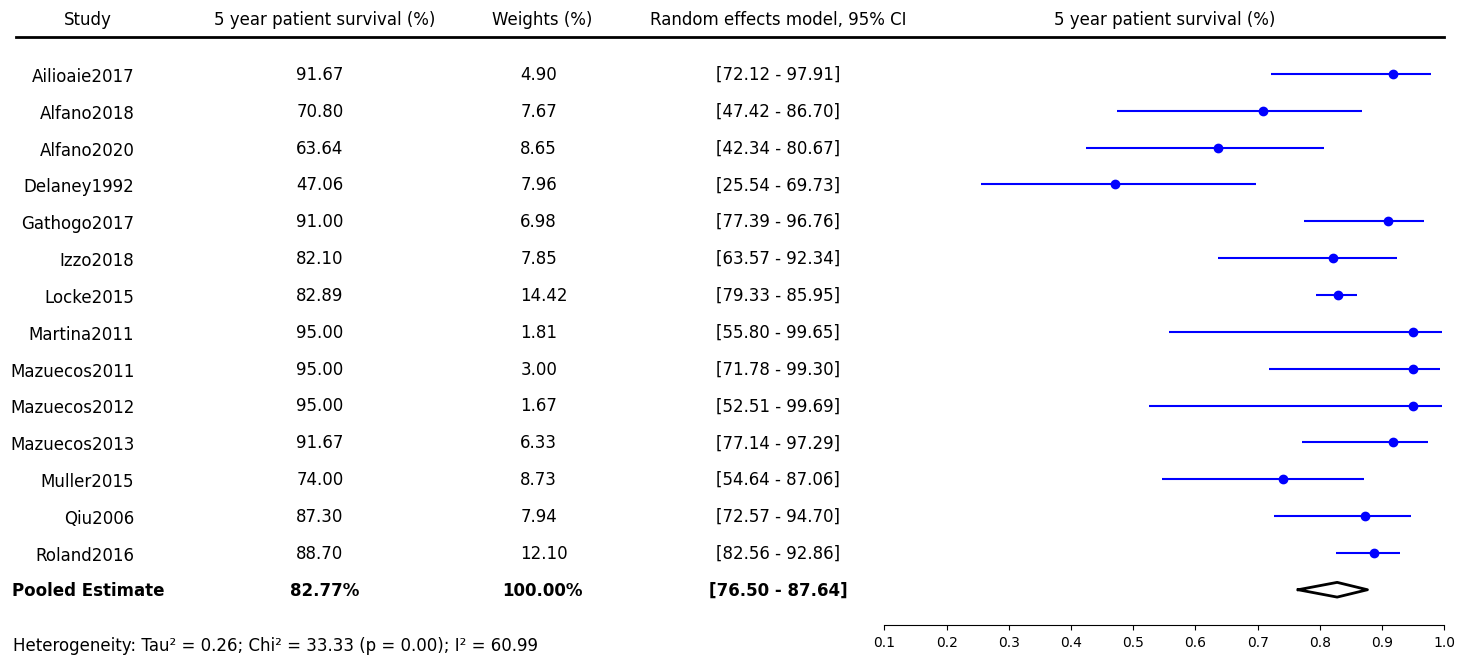

<Figure size 640x480 with 0 Axes>

In [262]:
# Load the JSON data
with open("/mnt/d/pydatascience/hiv_txp_sr/results/5_yr_pt_survival.json", 'r') as f:
    data = json.load(f)

# Extract the necessary data for the forest plot
combined_results = data['combined_results']

studies = [result['study_id'] for result in combined_results[:-1]]  # Exclude 'Pooled Estimate'
effect_sizes = [result['effect_size'] for result in combined_results[:-1]]
lower_ci = [result['ci_lb'] for result in combined_results[:-1]]
upper_ci = [result['ci_ub'] for result in combined_results[:-1]]
weights = [result['weight_percent'] for result in combined_results[:-1]]

# Get the combined OR for the pooled estimate
combined_OR = combined_results[-1]

# Set figure size
fig, ax = plt.subplots(figsize=(7,8))
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# Define the size of the space on the left for the numeric data and on the right for the forest plot
left_space = 0.1
right_space = 0.9
left_limit = -1  # Negative to provide more space for the left numeric data
right_limit = 1  # Less than 1 to limit the forest plot region on the right

# Customize the plot
ax.errorbar(effect_sizes, np.arange(len(studies)), 
            xerr=[np.array(effect_sizes) - np.array(lower_ci), np.array(upper_ci) - np.array(effect_sizes)], 
            fmt='o', color='blue', label='Effect Sizes')
ax.plot([combined_OR['ci_lb'], combined_OR['effect_size'], combined_OR['ci_ub'], combined_OR['effect_size'], combined_OR['ci_lb']], 
        [len(studies), len(studies) - 0.2, len(studies), len(studies) + 0.2, len(studies)], 'k-', linewidth=2, label='95% CI of Pooled Estimate')

# Customize the plot further
ax.set_xlim([0.1, 1])
ax.set_yticks(np.arange(len(studies)))
ax.get_yaxis().set_tick_params(length=0) 
ax.set_yticklabels(studies,fontsize=12)
ax.yaxis.set_tick_params(pad=540)
ax.invert_yaxis()  # Invert the y-axis to have the first study at the top

# Manually set the axes positions to allow space for the numeric data on the left
pos = ax.get_position()
pos.x0 = left_space
pos.x1 = right_space  
ax.set_position(pos)

# # Annotations and labels
ax.text(-1.18, -1.5, "Study", va='center', ha='center', fontsize=12)
ax.text(-0.8, - 1.5, "5 year patient survival (%)", va='center', ha='center', fontsize=12)
ax.text(-0.45, -1.5, "Weights (%)", va='center', ha='center', fontsize=12)
ax.text(-0.07, -1.5, "Random effects model, 95% CI", va='center', ha='center', fontsize=12)
ax.text(0.55, -1.5, "5 year patient survival (%)", va='center', ha='center', fontsize=12)

# Annotations and labels for study names, events, and weights
for i, study in enumerate(studies):
    ax.text(-1.05, i, f"{effect_sizes[i] * 100:.2f}", verticalalignment='center', horizontalalignment='left', fontsize=12, transform=ax.get_yaxis_transform())
    ax.text(-0.65, i, f"{weights[i]:.2f}", verticalalignment='center', horizontalalignment='left', fontsize=12, transform=ax.get_yaxis_transform())
    ax.text(-0.3, i, f"[{lower_ci[i] * 100:.2f} - {upper_ci[i] * 100:.2f}]", verticalalignment='center', horizontalalignment='left', fontsize=12, transform=ax.get_yaxis_transform())

# Add numeric data of the combined effect
ax.text(-1.18, len(studies), "Pooled Estimate", va='center', ha='center', fontsize=12, fontweight='bold')
ax.text(-0.8, len(studies), f"{combined_OR['effect_size'] * 100:.2f}%", va='center', ha='center', fontsize=12, fontweight='bold')
ax.text(-0.45, len(studies), f"{combined_OR['weight_percent']:.2f}%", va='center', ha='center', fontsize=12, fontweight='bold')
ax.text(-0.07, len(studies), f"[{combined_OR['ci_lb'] * 100:.2f} - {combined_OR['ci_ub']* 100:.2f}]", va='center', ha='center', fontsize=12, fontweight='bold')

# Add annotation of Heterogeneity, overall effect
ax.text(-1.3, len(studies) + 1.5, f"Heterogeneity: Tau² = {data['tau2']:.2f}; Chi² = {data['Q']:.2f} (p = {data['p_value_for_Q']:.2f}); I² = {data['I2']:.2f}", va='center', ha='left', fontsize=12)
# ax.text(-0.2, 5, f"Test for overall effect: Z = {summary_df['Value'].iloc[5]} (p = {summary_df['Value'].iloc[6]})", va='center', ha='left', fontsize=12)

# Draw the long horizontal line
axhline = plt.axhline(y=-1, color='black', linestyle='-', lw=2)
axhline.set_clip_on(False)
axhline.set_xdata([left_limit - 0.55, right_limit])

# Show the plot
plt.show()
plt.savefig('/mnt/d/pydatascience/hiv_txp_sr/results/5_yr_pt_survival.png', dpi=1000)


#### 1 year graft survival

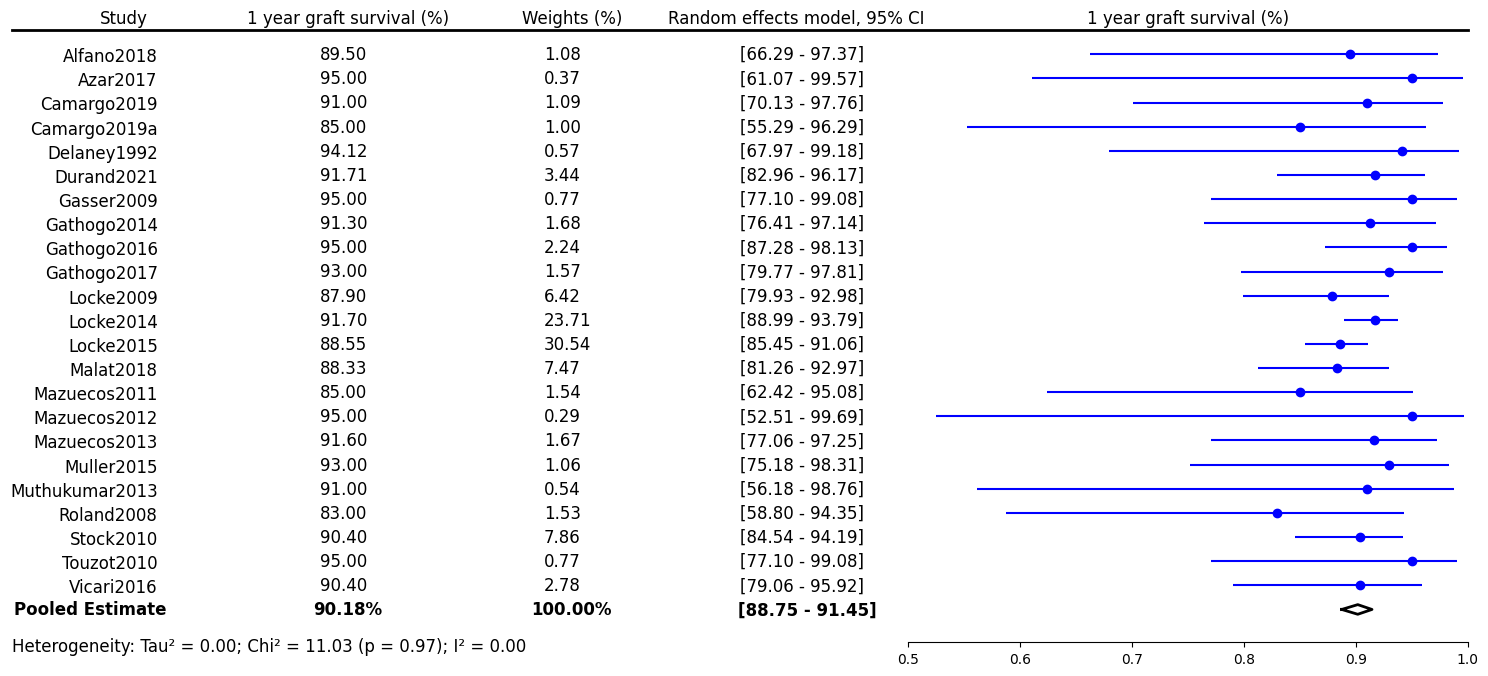

<Figure size 640x480 with 0 Axes>

In [263]:
# Load the JSON data
with open("/mnt/d/pydatascience/hiv_txp_sr/results/1_yr_gf_survival.json", 'r') as f:
    data = json.load(f)

# Extract the necessary data for the forest plot
combined_results = data['combined_results']

studies = [result['study_id'] for result in combined_results[:-1]]  # Exclude 'Pooled Estimate'
effect_sizes = [result['effect_size'] for result in combined_results[:-1]]
lower_ci = [result['ci_lb'] for result in combined_results[:-1]]
upper_ci = [result['ci_ub'] for result in combined_results[:-1]]
weights = [result['weight_percent'] for result in combined_results[:-1]]

# Get the combined OR for the pooled estimate
combined_OR = combined_results[-1]

# Set figure size
fig, ax = plt.subplots(figsize=(7,8))
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# Define the size of the space on the left for the numeric data and on the right for the forest plot
left_space = 0.1
right_space = 0.9
left_limit = -1  # Negative to provide more space for the left numeric data
right_limit = 1  # Less than 1 to limit the forest plot region on the right

# Customize the plot
ax.errorbar(effect_sizes, np.arange(len(studies)), 
            xerr=[np.array(effect_sizes) - np.array(lower_ci), np.array(upper_ci) - np.array(effect_sizes)], 
            fmt='o', color='blue', label='Effect Sizes')
ax.plot([combined_OR['ci_lb'], combined_OR['effect_size'], combined_OR['ci_ub'], combined_OR['effect_size'], combined_OR['ci_lb']], 
        [len(studies), len(studies) - 0.2, len(studies), len(studies) + 0.2, len(studies)], 'k-', linewidth=2, label='95% CI of Pooled Estimate')

# Customize the plot further
ax.set_xlim([0.5, 1])
ax.set_yticks(np.arange(len(studies)))
ax.get_yaxis().set_tick_params(length=0) 
ax.set_yticklabels(studies,fontsize=12)
ax.yaxis.set_tick_params(pad=540)
ax.invert_yaxis()  # Invert the y-axis to have the first study at the top

# Manually set the axes positions to allow space for the numeric data on the left
pos = ax.get_position()
pos.x0 = left_space
pos.x1 = right_space  
ax.set_position(pos)

# # Annotations and labels
ax.text(-0.2, -1.5, "Study", va='center', ha='center', fontsize=12)
ax.text(0.0, - 1.5, "1 year graft survival (%)", va='center', ha='center', fontsize=12)
ax.text(0.2, -1.5, "Weights (%)", va='center', ha='center', fontsize=12)
ax.text(0.4, -1.5, "Random effects model, 95% CI", va='center', ha='center', fontsize=12)
ax.text(0.75, -1.5, "1 year graft survival (%)", va='center', ha='center', fontsize=12)

# Annotations and labels for study names, events, and weights
for i, study in enumerate(studies):
    ax.text(-1.05, i, f"{effect_sizes[i] * 100:.2f}", verticalalignment='center', horizontalalignment='left', fontsize=12, transform=ax.get_yaxis_transform())
    ax.text(-0.65, i, f"{weights[i]:.2f}", verticalalignment='center', horizontalalignment='left', fontsize=12, transform=ax.get_yaxis_transform())
    ax.text(-0.3, i, f"[{lower_ci[i] * 100:.2f} - {upper_ci[i] * 100:.2f}]", verticalalignment='center', horizontalalignment='left', fontsize=12, transform=ax.get_yaxis_transform())

# Add numeric data of the combined effect
ax.text(-0.23, len(studies), "Pooled Estimate", va='center', ha='center', fontsize=12, fontweight='bold')
ax.text(0, len(studies), f"{combined_OR['effect_size'] * 100:.2f}%", va='center', ha='center', fontsize=12, fontweight='bold')
ax.text(0.2, len(studies), f"{combined_OR['weight_percent']:.2f}%", va='center', ha='center', fontsize=12, fontweight='bold')
ax.text(0.41, len(studies), f"[{combined_OR['ci_lb'] * 100:.2f} - {combined_OR['ci_ub']* 100:.2f}]", va='center', ha='center', fontsize=12, fontweight='bold')

# Add annotation of Heterogeneity, overall effect
ax.text(-0.3, len(studies) + 1.5, f"Heterogeneity: Tau² = {data['tau2']:.2f}; Chi² = {data['Q']:.2f} (p = {data['p_value_for_Q']:.2f}); I² = {data['I2']:.2f}", va='center', ha='left', fontsize=12)
# ax.text(-0.2, 5, f"Test for overall effect: Z = {summary_df['Value'].iloc[5]} (p = {summary_df['Value'].iloc[6]})", va='center', ha='left', fontsize=12)

# Draw the long horizontal line
axhline = plt.axhline(y=-1, color='black', linestyle='-', lw=2)
axhline.set_clip_on(False)
axhline.set_xdata([left_limit - 0.6, right_limit])

# Show the plot
plt.show()
plt.savefig('/mnt/d/pydatascience/hiv_txp_sr/results/1_yr_gf_survival.png', dpi=1000)


#### 3 year graft survival

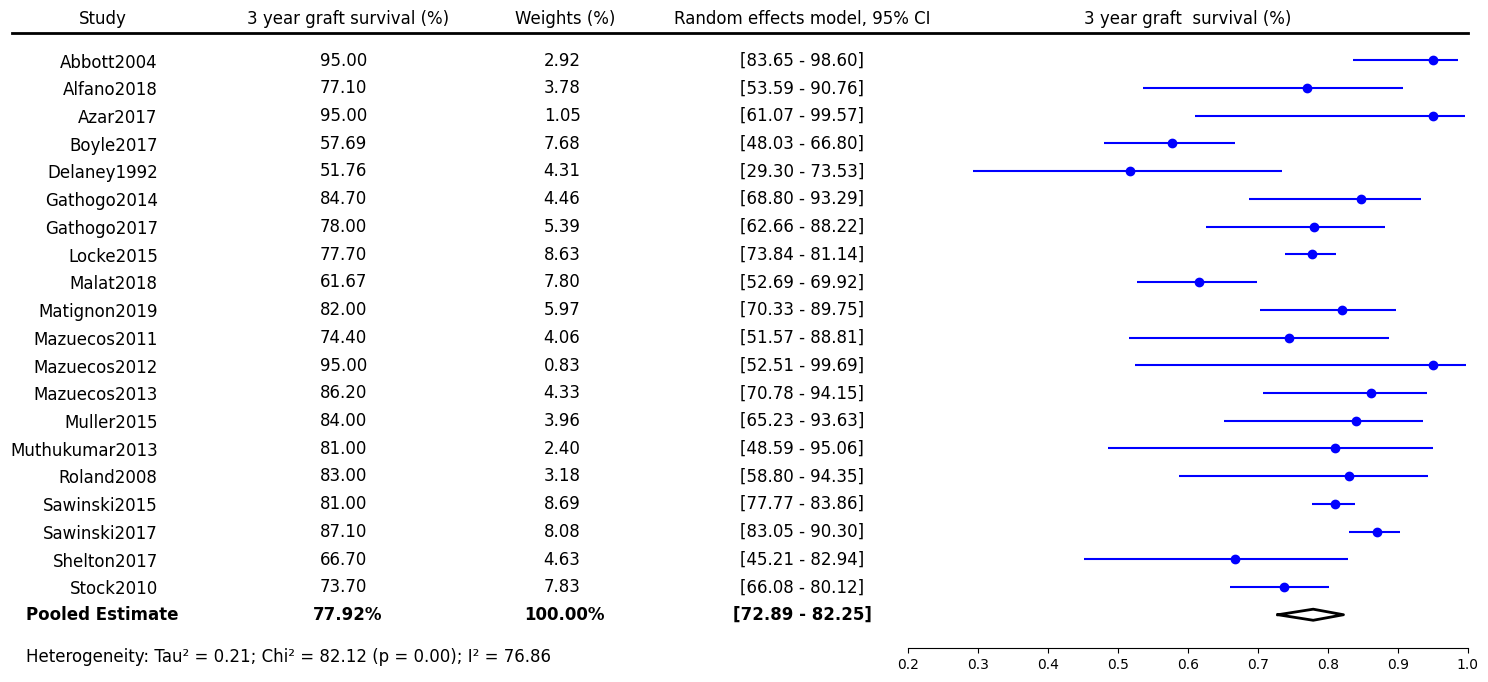

<Figure size 640x480 with 0 Axes>

In [266]:
# Load the JSON data
with open("/mnt/d/pydatascience/hiv_txp_sr/results/3_yr_gf_survival.json", 'r') as f:
    data = json.load(f)

# Extract the necessary data for the forest plot
combined_results = data['combined_results']

studies = [result['study_id'] for result in combined_results[:-1]]  # Exclude 'Pooled Estimate'
effect_sizes = [result['effect_size'] for result in combined_results[:-1]]
lower_ci = [result['ci_lb'] for result in combined_results[:-1]]
upper_ci = [result['ci_ub'] for result in combined_results[:-1]]
weights = [result['weight_percent'] for result in combined_results[:-1]]

# Get the combined OR for the pooled estimate
combined_OR = combined_results[-1]

# Set figure size
fig, ax = plt.subplots(figsize=(7,8))
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# Define the size of the space on the left for the numeric data and on the right for the forest plot
left_space = 0.1
right_space = 0.9
left_limit = -1  # Negative to provide more space for the left numeric data
right_limit = 1  # Less than 1 to limit the forest plot region on the right

# Customize the plot
ax.errorbar(effect_sizes, np.arange(len(studies)), 
            xerr=[np.array(effect_sizes) - np.array(lower_ci), np.array(upper_ci) - np.array(effect_sizes)], 
            fmt='o', color='blue', label='Effect Sizes')
ax.plot([combined_OR['ci_lb'], combined_OR['effect_size'], combined_OR['ci_ub'], combined_OR['effect_size'], combined_OR['ci_lb']], 
        [len(studies), len(studies) - 0.2, len(studies), len(studies) + 0.2, len(studies)], 'k-', linewidth=2, label='95% CI of Pooled Estimate')

# Customize the plot further
ax.set_xlim([0.2, 1])
ax.set_yticks(np.arange(len(studies)))
ax.get_yaxis().set_tick_params(length=0) 
ax.set_yticklabels(studies,fontsize=12)
ax.yaxis.set_tick_params(pad=540)
ax.invert_yaxis()  # Invert the y-axis to have the first study at the top

# Manually set the axes positions to allow space for the numeric data on the left
pos = ax.get_position()
pos.x0 = left_space
pos.x1 = right_space  
ax.set_position(pos)

# # Annotations and labels
ax.text(-0.95, -1.5, "Study", va='center', ha='center', fontsize=12)
ax.text(-0.6, - 1.5, "3 year graft survival (%)", va='center', ha='center', fontsize=12)
ax.text(-0.29, -1.5, "Weights (%)", va='center', ha='center', fontsize=12)
ax.text(0.05, -1.5, "Random effects model, 95% CI", va='center', ha='center', fontsize=12)
ax.text(0.6, -1.5, "3 year graft  survival (%)", va='center', ha='center', fontsize=12)

# Annotations and labels for study names, events, and weights
for i, study in enumerate(studies):
    ax.text(-1.05, i, f"{effect_sizes[i] * 100:.2f}", verticalalignment='center', horizontalalignment='left', fontsize=12, transform=ax.get_yaxis_transform())
    ax.text(-0.65, i, f"{weights[i]:.2f}", verticalalignment='center', horizontalalignment='left', fontsize=12, transform=ax.get_yaxis_transform())
    ax.text(-0.3, i, f"[{lower_ci[i] * 100:.2f} - {upper_ci[i] * 100:.2f}]", verticalalignment='center', horizontalalignment='left', fontsize=12, transform=ax.get_yaxis_transform())

# Add numeric data of the combined effect
ax.text(-0.95, len(studies), "Pooled Estimate", va='center', ha='center', fontsize=12, fontweight='bold')
ax.text(-0.6, len(studies), f"{combined_OR['effect_size'] * 100:.2f}%", va='center', ha='center', fontsize=12, fontweight='bold')
ax.text(-0.29, len(studies), f"{combined_OR['weight_percent']:.2f}%", va='center', ha='center', fontsize=12, fontweight='bold')
ax.text(0.05, len(studies), f"[{combined_OR['ci_lb'] * 100:.2f} - {combined_OR['ci_ub']* 100:.2f}]", va='center', ha='center', fontsize=12, fontweight='bold')

# Add annotation of Heterogeneity, overall effect
ax.text(-1.06, len(studies) + 1.5, f"Heterogeneity: Tau² = {data['tau2']:.2f}; Chi² = {data['Q']:.2f} (p = {data['p_value_for_Q']:.2f}); I² = {data['I2']:.2f}", va='center', ha='left', fontsize=12)
# ax.text(-0.2, 5, f"Test for overall effect: Z = {summary_df['Value'].iloc[5]} (p = {summary_df['Value'].iloc[6]})", va='center', ha='left', fontsize=12)

# Draw the long horizontal line
axhline = plt.axhline(y=-1, color='black', linestyle='-', lw=2)
axhline.set_clip_on(False)
axhline.set_xdata([left_limit - 0.6, right_limit])

# Show the plot
plt.show()
plt.savefig('/mnt/d/pydatascience/hiv_txp_sr/results/3_yr_gf_survival.png', dpi=1000)


#### 5 year graft survival

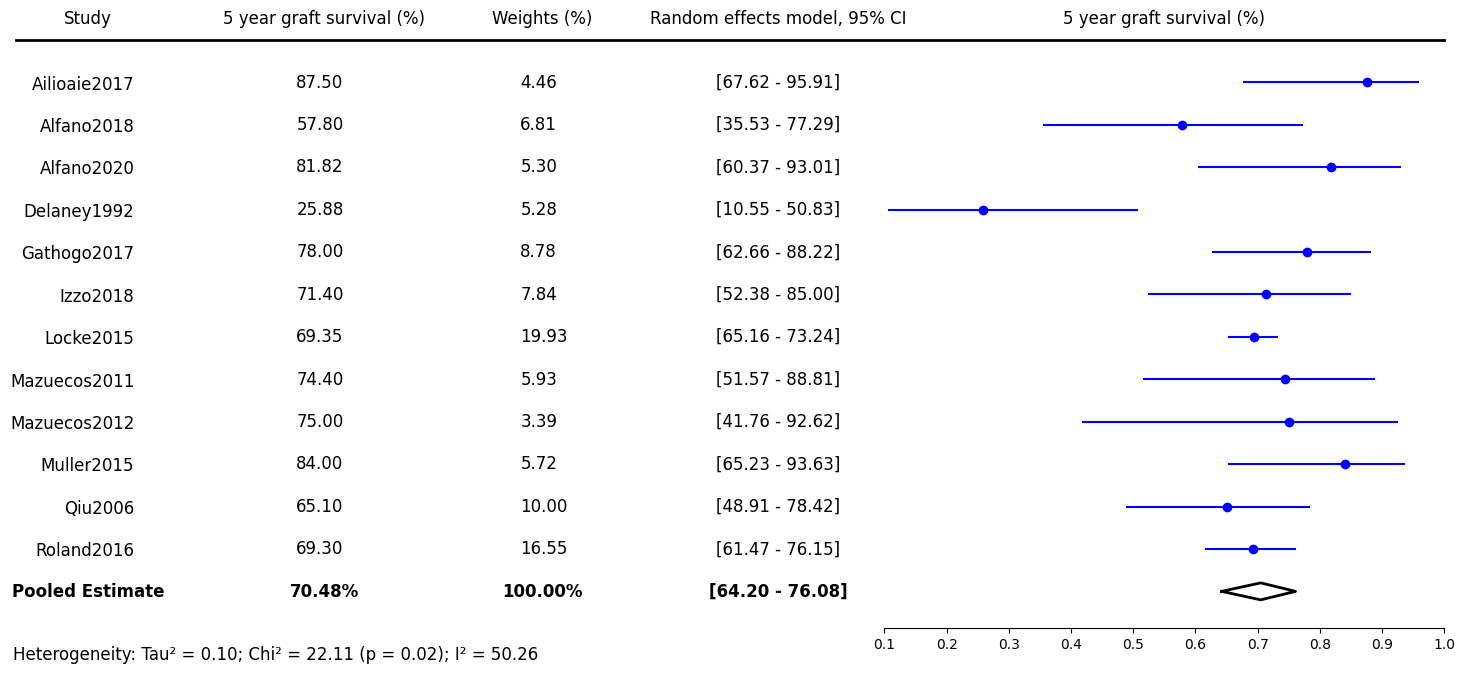

<Figure size 640x480 with 0 Axes>

In [267]:
# Load the JSON data
with open("/mnt/d/pydatascience/hiv_txp_sr/results/5_yr_gf_survival.json", 'r') as f:
    data = json.load(f)

# Extract the necessary data for the forest plot
combined_results = data['combined_results']

studies = [result['study_id'] for result in combined_results[:-1]]  # Exclude 'Pooled Estimate'
effect_sizes = [result['effect_size'] for result in combined_results[:-1]]
lower_ci = [result['ci_lb'] for result in combined_results[:-1]]
upper_ci = [result['ci_ub'] for result in combined_results[:-1]]
weights = [result['weight_percent'] for result in combined_results[:-1]]

# Get the combined OR for the pooled estimate
combined_OR = combined_results[-1]

# Set figure size
fig, ax = plt.subplots(figsize=(7,8))
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# Define the size of the space on the left for the numeric data and on the right for the forest plot
left_space = 0.1
right_space = 0.9
left_limit = -1  # Negative to provide more space for the left numeric data
right_limit = 1  # Less than 1 to limit the forest plot region on the right

# Customize the plot
ax.errorbar(effect_sizes, np.arange(len(studies)), 
            xerr=[np.array(effect_sizes) - np.array(lower_ci), np.array(upper_ci) - np.array(effect_sizes)], 
            fmt='o', color='blue', label='Effect Sizes')
ax.plot([combined_OR['ci_lb'], combined_OR['effect_size'], combined_OR['ci_ub'], combined_OR['effect_size'], combined_OR['ci_lb']], 
        [len(studies), len(studies) - 0.2, len(studies), len(studies) + 0.2, len(studies)], 'k-', linewidth=2, label='95% CI of Pooled Estimate')

# Customize the plot further
ax.set_xlim([0.1, 1])
ax.set_yticks(np.arange(len(studies)))
ax.get_yaxis().set_tick_params(length=0) 
ax.set_yticklabels(studies,fontsize=12)
ax.yaxis.set_tick_params(pad=540)
ax.invert_yaxis()  # Invert the y-axis to have the first study at the top

# Manually set the axes positions to allow space for the numeric data on the left
pos = ax.get_position()
pos.x0 = left_space
pos.x1 = right_space  
ax.set_position(pos)

# # Annotations and labels
ax.text(-1.18, -1.5, "Study", va='center', ha='center', fontsize=12)
ax.text(-0.8, - 1.5, "5 year graft survival (%)", va='center', ha='center', fontsize=12)
ax.text(-0.45, -1.5, "Weights (%)", va='center', ha='center', fontsize=12)
ax.text(-0.07, -1.5, "Random effects model, 95% CI", va='center', ha='center', fontsize=12)
ax.text(0.55, -1.5, "5 year graft survival (%)", va='center', ha='center', fontsize=12)

# Annotations and labels for study names, events, and weights
for i, study in enumerate(studies):
    ax.text(-1.05, i, f"{effect_sizes[i] * 100:.2f}", verticalalignment='center', horizontalalignment='left', fontsize=12, transform=ax.get_yaxis_transform())
    ax.text(-0.65, i, f"{weights[i]:.2f}", verticalalignment='center', horizontalalignment='left', fontsize=12, transform=ax.get_yaxis_transform())
    ax.text(-0.3, i, f"[{lower_ci[i] * 100:.2f} - {upper_ci[i] * 100:.2f}]", verticalalignment='center', horizontalalignment='left', fontsize=12, transform=ax.get_yaxis_transform())

# Add numeric data of the combined effect
ax.text(-1.18, len(studies), "Pooled Estimate", va='center', ha='center', fontsize=12, fontweight='bold')
ax.text(-0.8, len(studies), f"{combined_OR['effect_size'] * 100:.2f}%", va='center', ha='center', fontsize=12, fontweight='bold')
ax.text(-0.45, len(studies), f"{combined_OR['weight_percent']:.2f}%", va='center', ha='center', fontsize=12, fontweight='bold')
ax.text(-0.07, len(studies), f"[{combined_OR['ci_lb'] * 100:.2f} - {combined_OR['ci_ub']* 100:.2f}]", va='center', ha='center', fontsize=12, fontweight='bold')

# Add annotation of Heterogeneity, overall effect
ax.text(-1.3, len(studies) + 1.5, f"Heterogeneity: Tau² = {data['tau2']:.2f}; Chi² = {data['Q']:.2f} (p = {data['p_value_for_Q']:.2f}); I² = {data['I2']:.2f}", va='center', ha='left', fontsize=12)
# ax.text(-0.2, 5, f"Test for overall effect: Z = {summary_df['Value'].iloc[5]} (p = {summary_df['Value'].iloc[6]})", va='center', ha='left', fontsize=12)

# Draw the long horizontal line
axhline = plt.axhline(y=-1, color='black', linestyle='-', lw=2)
axhline.set_clip_on(False)
axhline.set_xdata([left_limit - 0.55, right_limit])

# Show the plot
plt.show()
plt.savefig('/mnt/d/pydatascience/hiv_txp_sr/results/5_yr_gf_survival.png', dpi=1000)


#### 1 year graft rejection

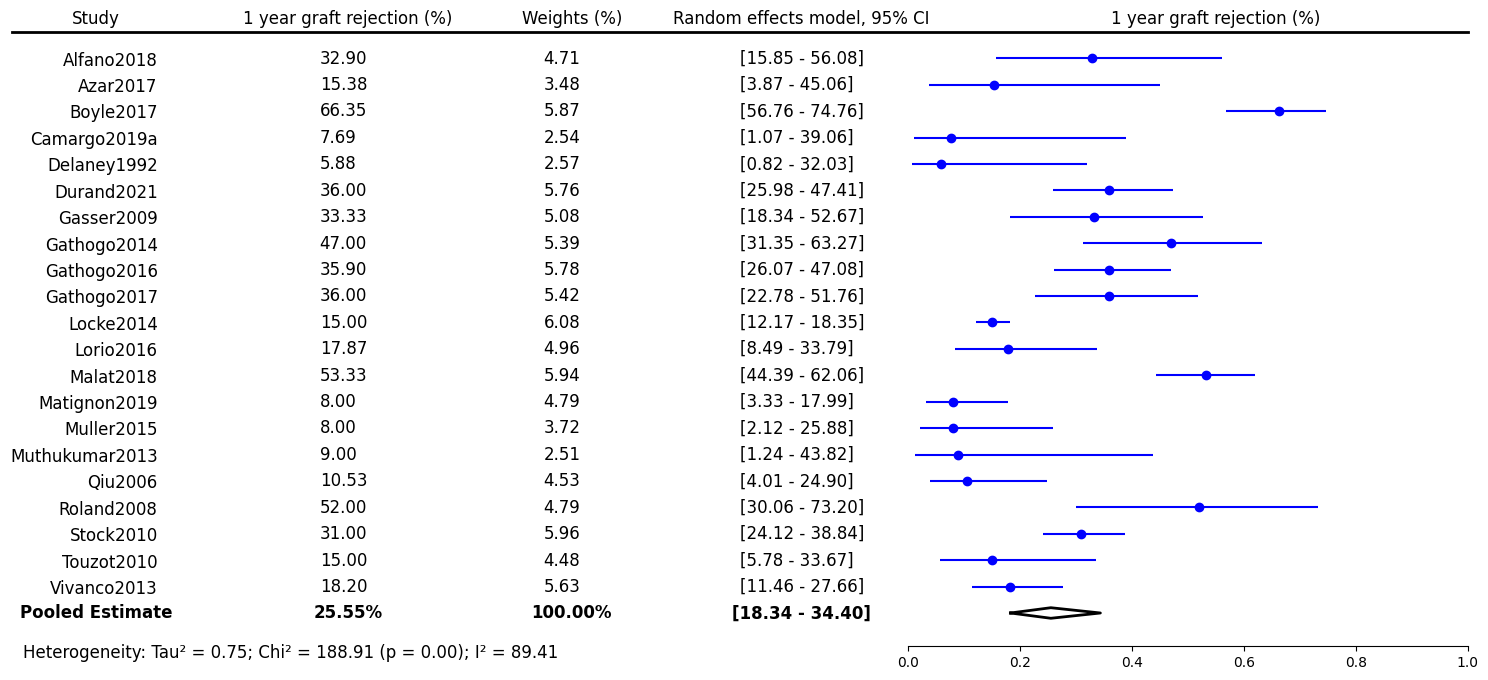

<Figure size 640x480 with 0 Axes>

In [297]:
# Load the JSON data
with open("/mnt/d/pydatascience/hiv_txp_sr/results/1_yr_gf_rejection.json", 'r') as f:
    data = json.load(f)

# Extract the necessary data for the forest plot
combined_results = data['combined_results']

studies = [result['study_id'] for result in combined_results[:-1]]  # Exclude 'Pooled Estimate'
effect_sizes = [result['effect_size'] for result in combined_results[:-1]]
lower_ci = [result['ci_lb'] for result in combined_results[:-1]]
upper_ci = [result['ci_ub'] for result in combined_results[:-1]]
weights = [result['weight_percent'] for result in combined_results[:-1]]

# Get the combined OR for the pooled estimate
combined_OR = combined_results[-1]

# Set figure size
fig, ax = plt.subplots(figsize=(7,8))
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# Define the size of the space on the left for the numeric data and on the right for the forest plot
left_space = 0.1
right_space = 0.9
left_limit = -1  # Negative to provide more space for the left numeric data
right_limit = 1  # Less than 1 to limit the forest plot region on the right

# Customize the plot
ax.errorbar(effect_sizes, np.arange(len(studies)), 
            xerr=[np.array(effect_sizes) - np.array(lower_ci), np.array(upper_ci) - np.array(effect_sizes)], 
            fmt='o', color='blue', label='Effect Sizes')
ax.plot([combined_OR['ci_lb'], combined_OR['effect_size'], combined_OR['ci_ub'], combined_OR['effect_size'], combined_OR['ci_lb']], 
        [len(studies), len(studies) - 0.2, len(studies), len(studies) + 0.2, len(studies)], 'k-', linewidth=2, label='95% CI of Pooled Estimate')

# Customize the plot further
ax.set_xlim([0, 1])
ax.set_yticks(np.arange(len(studies)))
ax.get_yaxis().set_tick_params(length=0) 
ax.set_yticklabels(studies,fontsize=12)
ax.yaxis.set_tick_params(pad=540)
ax.invert_yaxis()  # Invert the y-axis to have the first study at the top

# Manually set the axes positions to allow space for the numeric data on the left
pos = ax.get_position()
pos.x0 = left_space
pos.x1 = right_space  
ax.set_position(pos)

# # Annotations and labels
ax.text(-1.45, -1.5, "Study", va='center', ha='center', fontsize=12)
ax.text(-1, - 1.5, "1 year graft rejection (%)", va='center', ha='center', fontsize=12)
ax.text(-0.6, -1.5, "Weights (%)", va='center', ha='center', fontsize=12)
ax.text(-0.19, -1.5, "Random effects model, 95% CI", va='center', ha='center', fontsize=12)
ax.text(0.55, -1.5, "1 year graft rejection (%)", va='center', ha='center', fontsize=12)

# Annotations and labels for study names, events, and weights
for i, study in enumerate(studies):
    ax.text(-1.05, i, f"{effect_sizes[i] * 100:.2f}", verticalalignment='center', horizontalalignment='left', fontsize=12, transform=ax.get_yaxis_transform())
    ax.text(-0.65, i, f"{weights[i]:.2f}", verticalalignment='center', horizontalalignment='left', fontsize=12, transform=ax.get_yaxis_transform())
    ax.text(-0.3, i, f"[{lower_ci[i] * 100:.2f} - {upper_ci[i] * 100:.2f}]", verticalalignment='center', horizontalalignment='left', fontsize=12, transform=ax.get_yaxis_transform())

# Add numeric data of the combined effect
ax.text(-1.45, len(studies), "Pooled Estimate", va='center', ha='center', fontsize=12, fontweight='bold')
ax.text(-1, len(studies), f"{combined_OR['effect_size'] * 100:.2f}%", va='center', ha='center', fontsize=12, fontweight='bold')
ax.text(-0.6, len(studies), f"{combined_OR['weight_percent']:.2f}%", va='center', ha='center', fontsize=12, fontweight='bold')
ax.text(-0.19, len(studies), f"[{combined_OR['ci_lb'] * 100:.2f} - {combined_OR['ci_ub']* 100:.2f}]", va='center', ha='center', fontsize=12, fontweight='bold')

# Add annotation of Heterogeneity, overall effect
ax.text(-1.58, len(studies) + 1.5, f"Heterogeneity: Tau² = {data['tau2']:.2f}; Chi² = {data['Q']:.2f} (p = {data['p_value_for_Q']:.2f}); I² = {data['I2']:.2f}", va='center', ha='left', fontsize=12)
# ax.text(-0.2, 5, f"Test for overall effect: Z = {summary_df['Value'].iloc[5]} (p = {summary_df['Value'].iloc[6]})", va='center', ha='left', fontsize=12)

# Draw the long horizontal line
axhline = plt.axhline(y=-1, color='black', linestyle='-', lw=2)
axhline.set_clip_on(False)
axhline.set_xdata([left_limit - 0.6, right_limit])

# Show the plot
plt.show()
plt.savefig('/mnt/d/pydatascience/hiv_txp_sr/results/1_yr_gf_rejection.png', dpi=1000)


#### 3 year graft rejection

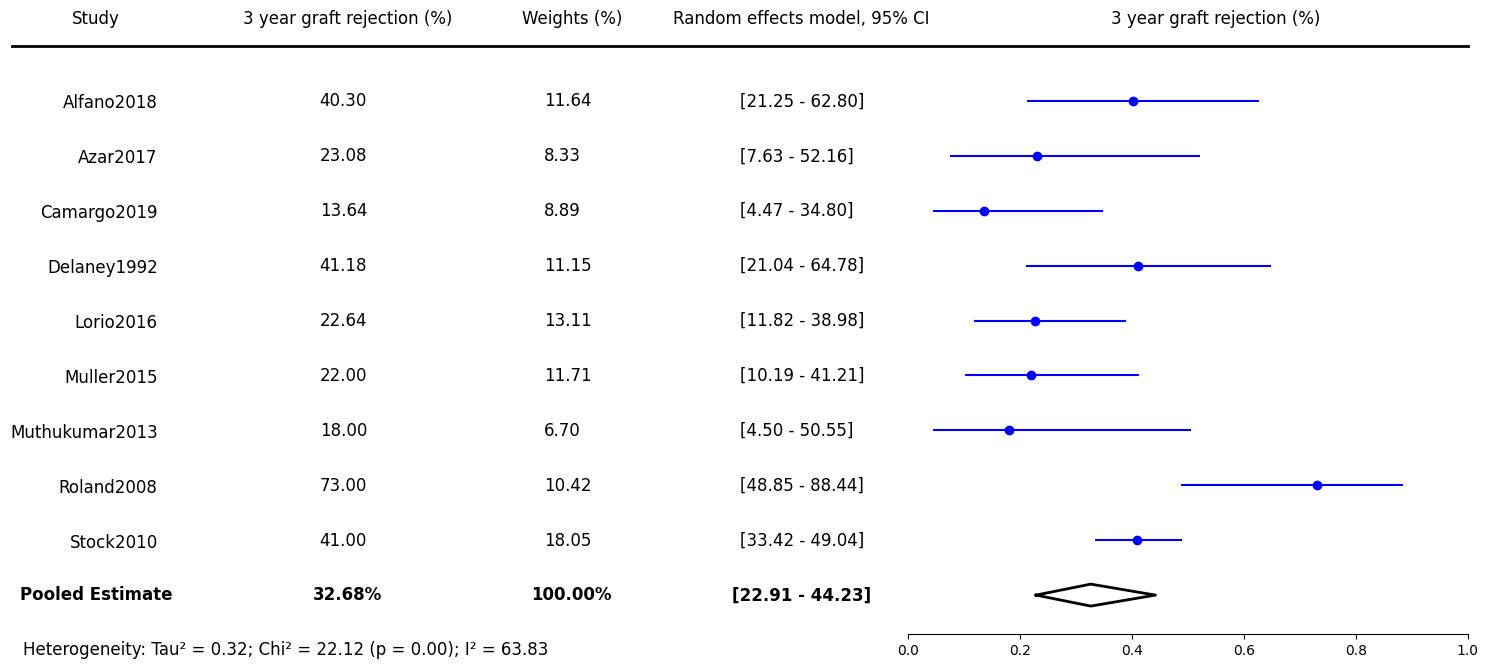

<Figure size 640x480 with 0 Axes>

In [299]:
# Load the JSON data
with open("/mnt/d/pydatascience/hiv_txp_sr/results/3_yr_gf_rejection.json", 'r') as f:
    data = json.load(f)

# Extract the necessary data for the forest plot
combined_results = data['combined_results']

studies = [result['study_id'] for result in combined_results[:-1]]  # Exclude 'Pooled Estimate'
effect_sizes = [result['effect_size'] for result in combined_results[:-1]]
lower_ci = [result['ci_lb'] for result in combined_results[:-1]]
upper_ci = [result['ci_ub'] for result in combined_results[:-1]]
weights = [result['weight_percent'] for result in combined_results[:-1]]

# Get the combined OR for the pooled estimate
combined_OR = combined_results[-1]

# Set figure size
fig, ax = plt.subplots(figsize=(7,8))
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# Define the size of the space on the left for the numeric data and on the right for the forest plot
left_space = 0.1
right_space = 0.9
left_limit = -1  # Negative to provide more space for the left numeric data
right_limit = 1  # Less than 1 to limit the forest plot region on the right

# Customize the plot
ax.errorbar(effect_sizes, np.arange(len(studies)), 
            xerr=[np.array(effect_sizes) - np.array(lower_ci), np.array(upper_ci) - np.array(effect_sizes)], 
            fmt='o', color='blue', label='Effect Sizes')
ax.plot([combined_OR['ci_lb'], combined_OR['effect_size'], combined_OR['ci_ub'], combined_OR['effect_size'], combined_OR['ci_lb']], 
        [len(studies), len(studies) - 0.2, len(studies), len(studies) + 0.2, len(studies)], 'k-', linewidth=2, label='95% CI of Pooled Estimate')

# Customize the plot further
ax.set_xlim([0, 1])
ax.set_yticks(np.arange(len(studies)))
ax.get_yaxis().set_tick_params(length=0) 
ax.set_yticklabels(studies,fontsize=12)
ax.yaxis.set_tick_params(pad=540)
ax.invert_yaxis()  # Invert the y-axis to have the first study at the top

# Manually set the axes positions to allow space for the numeric data on the left
pos = ax.get_position()
pos.x0 = left_space
pos.x1 = right_space  
ax.set_position(pos)

# # Annotations and labels
ax.text(-1.45, -1.5, "Study", va='center', ha='center', fontsize=12)
ax.text(-1, - 1.5, "3 year graft rejection (%)", va='center', ha='center', fontsize=12)
ax.text(-0.6, -1.5, "Weights (%)", va='center', ha='center', fontsize=12)
ax.text(-0.19, -1.5, "Random effects model, 95% CI", va='center', ha='center', fontsize=12)
ax.text(0.55, -1.5, "3 year graft rejection (%)", va='center', ha='center', fontsize=12)

# Annotations and labels for study names, events, and weights
for i, study in enumerate(studies):
    ax.text(-1.05, i, f"{effect_sizes[i] * 100:.2f}", verticalalignment='center', horizontalalignment='left', fontsize=12, transform=ax.get_yaxis_transform())
    ax.text(-0.65, i, f"{weights[i]:.2f}", verticalalignment='center', horizontalalignment='left', fontsize=12, transform=ax.get_yaxis_transform())
    ax.text(-0.3, i, f"[{lower_ci[i] * 100:.2f} - {upper_ci[i] * 100:.2f}]", verticalalignment='center', horizontalalignment='left', fontsize=12, transform=ax.get_yaxis_transform())

# Add numeric data of the combined effect
ax.text(-1.45, len(studies), "Pooled Estimate", va='center', ha='center', fontsize=12, fontweight='bold')
ax.text(-1, len(studies), f"{combined_OR['effect_size'] * 100:.2f}%", va='center', ha='center', fontsize=12, fontweight='bold')
ax.text(-0.6, len(studies), f"{combined_OR['weight_percent']:.2f}%", va='center', ha='center', fontsize=12, fontweight='bold')
ax.text(-0.19, len(studies), f"[{combined_OR['ci_lb'] * 100:.2f} - {combined_OR['ci_ub']* 100:.2f}]", va='center', ha='center', fontsize=12, fontweight='bold')

# Add annotation of Heterogeneity, overall effect
ax.text(-1.58, len(studies) + 1, f"Heterogeneity: Tau² = {data['tau2']:.2f}; Chi² = {data['Q']:.2f} (p = {data['p_value_for_Q']:.2f}); I² = {data['I2']:.2f}", va='center', ha='left', fontsize=12)
# ax.text(-0.2, 5, f"Test for overall effect: Z = {summary_df['Value'].iloc[5]} (p = {summary_df['Value'].iloc[6]})", va='center', ha='left', fontsize=12)

# Draw the long horizontal line
axhline = plt.axhline(y=-1, color='black', linestyle='-', lw=2)
axhline.set_clip_on(False)
axhline.set_xdata([left_limit - 0.6, right_limit])

# Show the plot
plt.show()
plt.savefig('/mnt/d/pydatascience/hiv_txp_sr/results/3_yr_gf_rejection.png', dpi=1000)

#### 5 year graft rejection

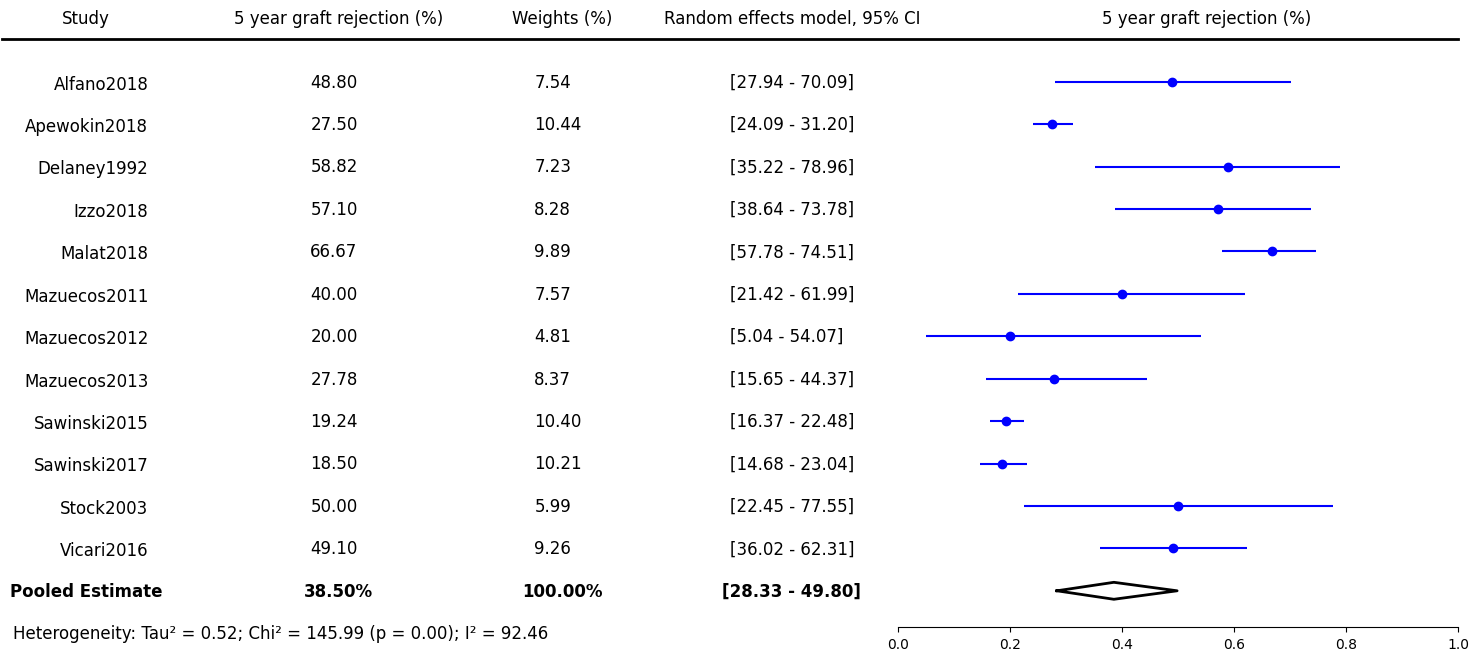

<Figure size 640x480 with 0 Axes>

In [300]:
# Load the JSON data
with open("/mnt/d/pydatascience/hiv_txp_sr/results/5_yr_gf_rejection.json", 'r') as f:
    data = json.load(f)

# Extract the necessary data for the forest plot
combined_results = data['combined_results']

studies = [result['study_id'] for result in combined_results[:-1]]  # Exclude 'Pooled Estimate'
effect_sizes = [result['effect_size'] for result in combined_results[:-1]]
lower_ci = [result['ci_lb'] for result in combined_results[:-1]]
upper_ci = [result['ci_ub'] for result in combined_results[:-1]]
weights = [result['weight_percent'] for result in combined_results[:-1]]

# Get the combined OR for the pooled estimate
combined_OR = combined_results[-1]

# Set figure size
fig, ax = plt.subplots(figsize=(7,8))
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# Define the size of the space on the left for the numeric data and on the right for the forest plot
left_space = 0.1
right_space = 0.9
left_limit = -1  # Negative to provide more space for the left numeric data
right_limit = 1  # Less than 1 to limit the forest plot region on the right

# Customize the plot
ax.errorbar(effect_sizes, np.arange(len(studies)), 
            xerr=[np.array(effect_sizes) - np.array(lower_ci), np.array(upper_ci) - np.array(effect_sizes)], 
            fmt='o', color='blue', label='Effect Sizes')
ax.plot([combined_OR['ci_lb'], combined_OR['effect_size'], combined_OR['ci_ub'], combined_OR['effect_size'], combined_OR['ci_lb']], 
        [len(studies), len(studies) - 0.2, len(studies), len(studies) + 0.2, len(studies)], 'k-', linewidth=2, label='95% CI of Pooled Estimate')

# Customize the plot further
ax.set_xlim([0, 1])
ax.set_yticks(np.arange(len(studies)))
ax.get_yaxis().set_tick_params(length=0) 
ax.set_yticklabels(studies,fontsize=12)
ax.yaxis.set_tick_params(pad=540)
ax.invert_yaxis()  # Invert the y-axis to have the first study at the top

# Manually set the axes positions to allow space for the numeric data on the left
pos = ax.get_position()
pos.x0 = left_space
pos.x1 = right_space  
ax.set_position(pos)

# # Annotations and labels
ax.text(-1.45, -1.5, "Study", va='center', ha='center', fontsize=12)
ax.text(-1, - 1.5, "5 year graft rejection (%)", va='center', ha='center', fontsize=12)
ax.text(-0.6, -1.5, "Weights (%)", va='center', ha='center', fontsize=12)
ax.text(-0.19, -1.5, "Random effects model, 95% CI", va='center', ha='center', fontsize=12)
ax.text(0.55, -1.5, "5 year graft rejection (%)", va='center', ha='center', fontsize=12)

# Annotations and labels for study names, events, and weights
for i, study in enumerate(studies):
    ax.text(-1.05, i, f"{effect_sizes[i] * 100:.2f}", verticalalignment='center', horizontalalignment='left', fontsize=12, transform=ax.get_yaxis_transform())
    ax.text(-0.65, i, f"{weights[i]:.2f}", verticalalignment='center', horizontalalignment='left', fontsize=12, transform=ax.get_yaxis_transform())
    ax.text(-0.3, i, f"[{lower_ci[i] * 100:.2f} - {upper_ci[i] * 100:.2f}]", verticalalignment='center', horizontalalignment='left', fontsize=12, transform=ax.get_yaxis_transform())

# Add numeric data of the combined effect
ax.text(-1.45, len(studies), "Pooled Estimate", va='center', ha='center', fontsize=12, fontweight='bold')
ax.text(-1, len(studies), f"{combined_OR['effect_size'] * 100:.2f}%", va='center', ha='center', fontsize=12, fontweight='bold')
ax.text(-0.6, len(studies), f"{combined_OR['weight_percent']:.2f}%", va='center', ha='center', fontsize=12, fontweight='bold')
ax.text(-0.19, len(studies), f"[{combined_OR['ci_lb'] * 100:.2f} - {combined_OR['ci_ub']* 100:.2f}]", va='center', ha='center', fontsize=12, fontweight='bold')

# Add annotation of Heterogeneity, overall effect
ax.text(-1.58, len(studies) + 1, f"Heterogeneity: Tau² = {data['tau2']:.2f}; Chi² = {data['Q']:.2f} (p = {data['p_value_for_Q']:.2f}); I² = {data['I2']:.2f}", va='center', ha='left', fontsize=12)
# ax.text(-0.2, 5, f"Test for overall effect: Z = {summary_df['Value'].iloc[5]} (p = {summary_df['Value'].iloc[6]})", va='center', ha='left', fontsize=12)

# Draw the long horizontal line
axhline = plt.axhline(y=-1, color='black', linestyle='-', lw=2)
axhline.set_clip_on(False)
axhline.set_xdata([left_limit - 0.6, right_limit])

# Show the plot
plt.show()
plt.savefig('/mnt/d/pydatascience/hiv_txp_sr/results/5_yr_gf_rejection.png', dpi=1000)

#### 1 year infection

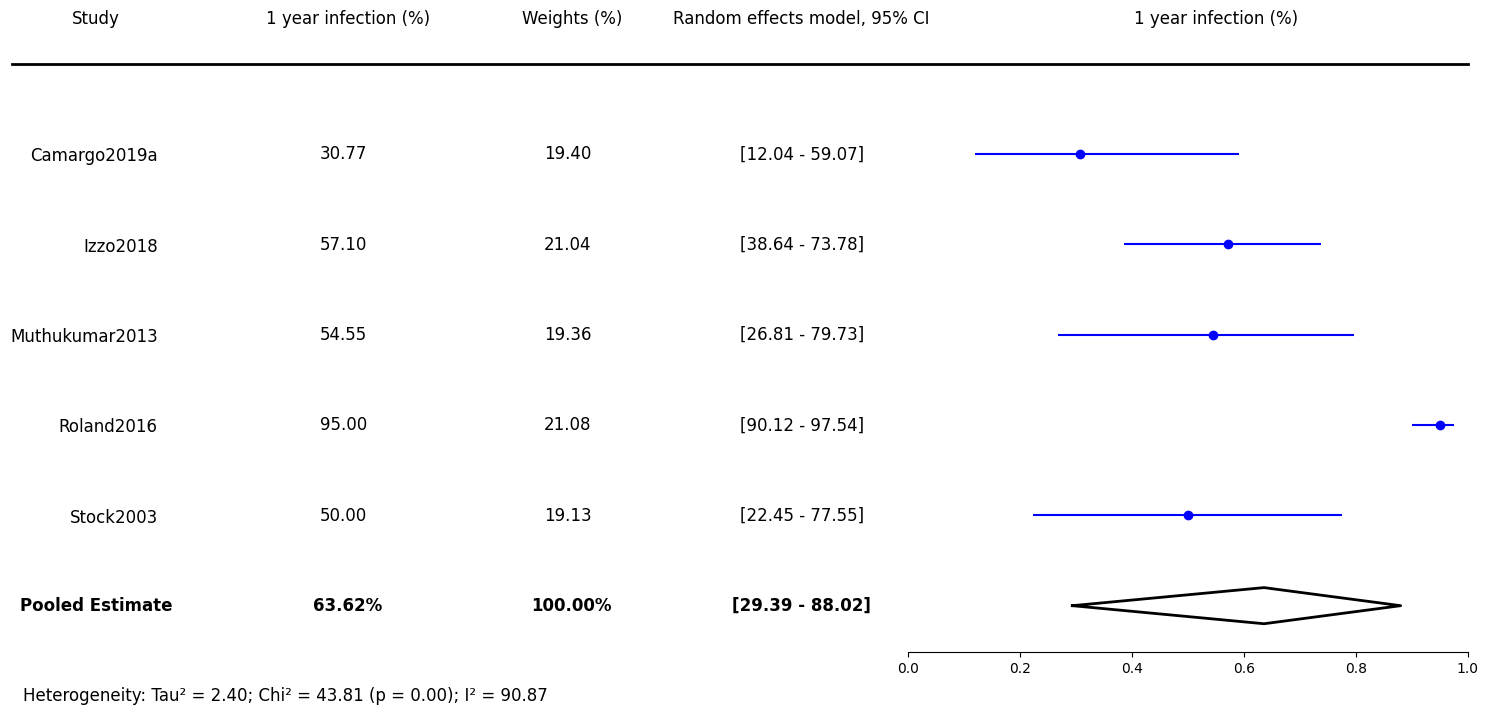

<Figure size 640x480 with 0 Axes>

In [303]:
# Load the JSON data
with open("/mnt/d/pydatascience/hiv_txp_sr/results/1_yr_infection.json", 'r') as f:
    data = json.load(f)

# Extract the necessary data for the forest plot
combined_results = data['combined_results']

studies = [result['study_id'] for result in combined_results[:-1]]  # Exclude 'Pooled Estimate'
effect_sizes = [result['effect_size'] for result in combined_results[:-1]]
lower_ci = [result['ci_lb'] for result in combined_results[:-1]]
upper_ci = [result['ci_ub'] for result in combined_results[:-1]]
weights = [result['weight_percent'] for result in combined_results[:-1]]

# Get the combined OR for the pooled estimate
combined_OR = combined_results[-1]

# Set figure size
fig, ax = plt.subplots(figsize=(7,8))
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# Define the size of the space on the left for the numeric data and on the right for the forest plot
left_space = 0.1
right_space = 0.9
left_limit = -1  # Negative to provide more space for the left numeric data
right_limit = 1  # Less than 1 to limit the forest plot region on the right

# Customize the plot
ax.errorbar(effect_sizes, np.arange(len(studies)), 
            xerr=[np.array(effect_sizes) - np.array(lower_ci), np.array(upper_ci) - np.array(effect_sizes)], 
            fmt='o', color='blue', label='Effect Sizes')
ax.plot([combined_OR['ci_lb'], combined_OR['effect_size'], combined_OR['ci_ub'], combined_OR['effect_size'], combined_OR['ci_lb']], 
        [len(studies), len(studies) - 0.2, len(studies), len(studies) + 0.2, len(studies)], 'k-', linewidth=2, label='95% CI of Pooled Estimate')

# Customize the plot further
ax.set_xlim([0, 1])
ax.set_yticks(np.arange(len(studies)))
ax.get_yaxis().set_tick_params(length=0) 
ax.set_yticklabels(studies,fontsize=12)
ax.yaxis.set_tick_params(pad=540)
ax.invert_yaxis()  # Invert the y-axis to have the first study at the top

# Manually set the axes positions to allow space for the numeric data on the left
pos = ax.get_position()
pos.x0 = left_space
pos.x1 = right_space  
ax.set_position(pos)

# # Annotations and labels
ax.text(-1.45, -1.5, "Study", va='center', ha='center', fontsize=12)
ax.text(-1, - 1.5, "1 year infection (%)", va='center', ha='center', fontsize=12)
ax.text(-0.6, -1.5, "Weights (%)", va='center', ha='center', fontsize=12)
ax.text(-0.19, -1.5, "Random effects model, 95% CI", va='center', ha='center', fontsize=12)
ax.text(0.55, -1.5, "1 year infection (%)", va='center', ha='center', fontsize=12)

# Annotations and labels for study names, events, and weights
for i, study in enumerate(studies):
    ax.text(-1.05, i, f"{effect_sizes[i] * 100:.2f}", verticalalignment='center', horizontalalignment='left', fontsize=12, transform=ax.get_yaxis_transform())
    ax.text(-0.65, i, f"{weights[i]:.2f}", verticalalignment='center', horizontalalignment='left', fontsize=12, transform=ax.get_yaxis_transform())
    ax.text(-0.3, i, f"[{lower_ci[i] * 100:.2f} - {upper_ci[i] * 100:.2f}]", verticalalignment='center', horizontalalignment='left', fontsize=12, transform=ax.get_yaxis_transform())

# Add numeric data of the combined effect
ax.text(-1.45, len(studies), "Pooled Estimate", va='center', ha='center', fontsize=12, fontweight='bold')
ax.text(-1, len(studies), f"{combined_OR['effect_size'] * 100:.2f}%", va='center', ha='center', fontsize=12, fontweight='bold')
ax.text(-0.6, len(studies), f"{combined_OR['weight_percent']:.2f}%", va='center', ha='center', fontsize=12, fontweight='bold')
ax.text(-0.19, len(studies), f"[{combined_OR['ci_lb'] * 100:.2f} - {combined_OR['ci_ub']* 100:.2f}]", va='center', ha='center', fontsize=12, fontweight='bold')

# Add annotation of Heterogeneity, overall effect
ax.text(-1.58, len(studies) + 1, f"Heterogeneity: Tau² = {data['tau2']:.2f}; Chi² = {data['Q']:.2f} (p = {data['p_value_for_Q']:.2f}); I² = {data['I2']:.2f}", va='center', ha='left', fontsize=12)
# ax.text(-0.2, 5, f"Test for overall effect: Z = {summary_df['Value'].iloc[5]} (p = {summary_df['Value'].iloc[6]})", va='center', ha='left', fontsize=12)

# Draw the long horizontal line
axhline = plt.axhline(y=-1, color='black', linestyle='-', lw=2)
axhline.set_clip_on(False)
axhline.set_xdata([left_limit - 0.6, right_limit])

# Show the plot
plt.show()
plt.savefig('/mnt/d/pydatascience/hiv_txp_sr/results/1_yr_infection.png', dpi=1000)

#### 3 year infection

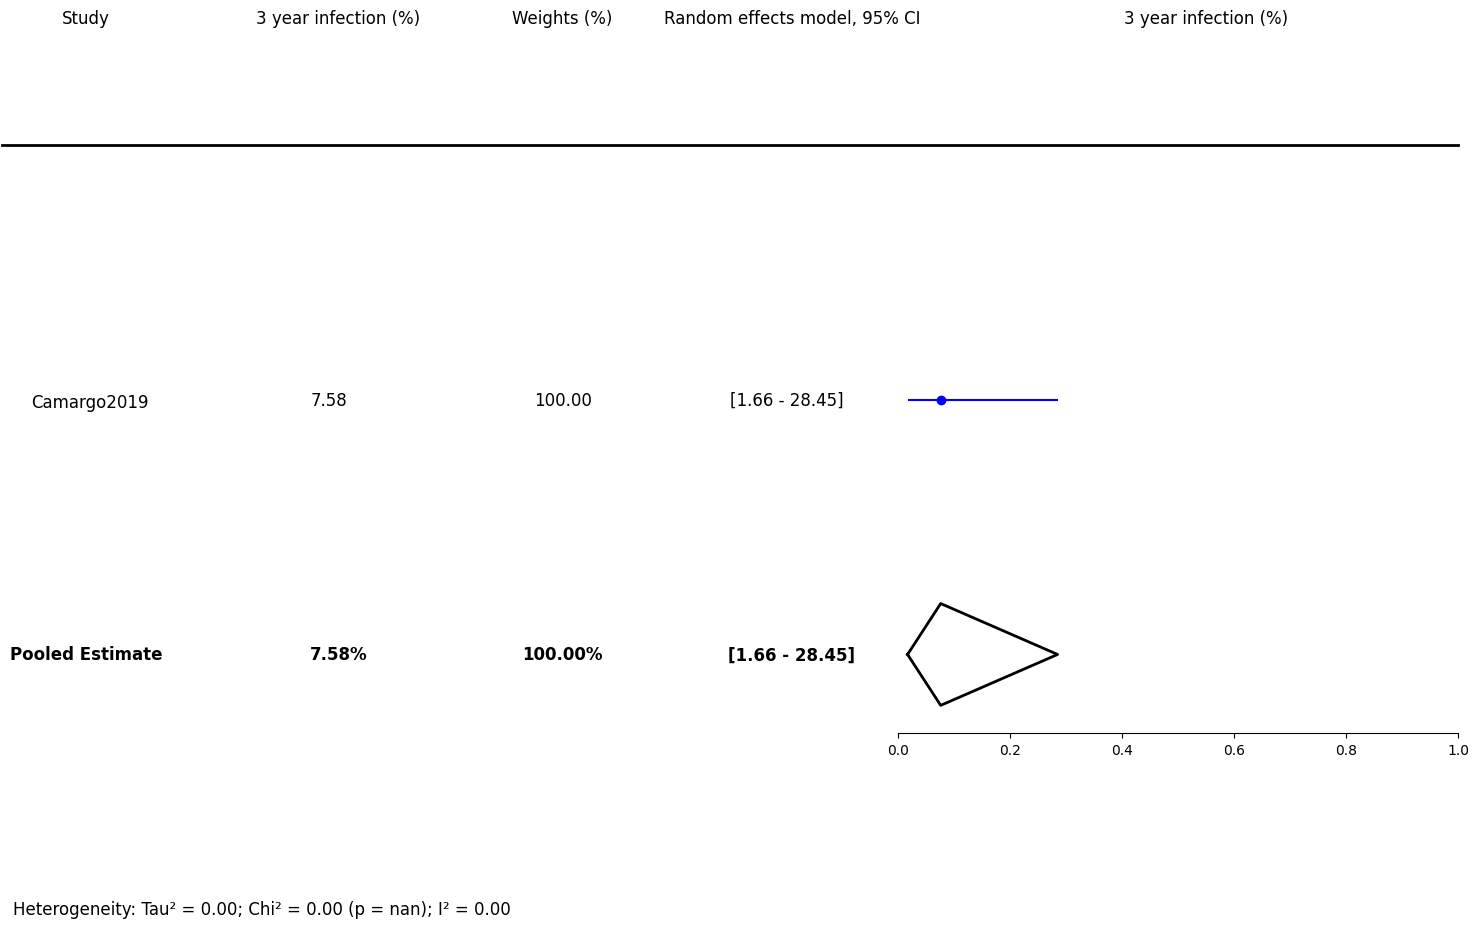

<Figure size 640x480 with 0 Axes>

In [304]:
# Load the JSON data
with open("/mnt/d/pydatascience/hiv_txp_sr/results/3_yr_infection.json", 'r') as f:
    data = json.load(f)

# Extract the necessary data for the forest plot
combined_results = data['combined_results']

studies = [result['study_id'] for result in combined_results[:-1]]  # Exclude 'Pooled Estimate'
effect_sizes = [result['effect_size'] for result in combined_results[:-1]]
lower_ci = [result['ci_lb'] for result in combined_results[:-1]]
upper_ci = [result['ci_ub'] for result in combined_results[:-1]]
weights = [result['weight_percent'] for result in combined_results[:-1]]

# Get the combined OR for the pooled estimate
combined_OR = combined_results[-1]

# Set figure size
fig, ax = plt.subplots(figsize=(7,8))
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# Define the size of the space on the left for the numeric data and on the right for the forest plot
left_space = 0.1
right_space = 0.9
left_limit = -1  # Negative to provide more space for the left numeric data
right_limit = 1  # Less than 1 to limit the forest plot region on the right

# Customize the plot
ax.errorbar(effect_sizes, np.arange(len(studies)), 
            xerr=[np.array(effect_sizes) - np.array(lower_ci), np.array(upper_ci) - np.array(effect_sizes)], 
            fmt='o', color='blue', label='Effect Sizes')
ax.plot([combined_OR['ci_lb'], combined_OR['effect_size'], combined_OR['ci_ub'], combined_OR['effect_size'], combined_OR['ci_lb']], 
        [len(studies), len(studies) - 0.2, len(studies), len(studies) + 0.2, len(studies)], 'k-', linewidth=2, label='95% CI of Pooled Estimate')

# Customize the plot further
ax.set_xlim([0, 1])
ax.set_yticks(np.arange(len(studies)))
ax.get_yaxis().set_tick_params(length=0) 
ax.set_yticklabels(studies,fontsize=12)
ax.yaxis.set_tick_params(pad=540)
ax.invert_yaxis()  # Invert the y-axis to have the first study at the top

# Manually set the axes positions to allow space for the numeric data on the left
pos = ax.get_position()
pos.x0 = left_space
pos.x1 = right_space  
ax.set_position(pos)

# # Annotations and labels
ax.text(-1.45, -1.5, "Study", va='center', ha='center', fontsize=12)
ax.text(-1, - 1.5, "3 year infection (%)", va='center', ha='center', fontsize=12)
ax.text(-0.6, -1.5, "Weights (%)", va='center', ha='center', fontsize=12)
ax.text(-0.19, -1.5, "Random effects model, 95% CI", va='center', ha='center', fontsize=12)
ax.text(0.55, -1.5, "3 year infection (%)", va='center', ha='center', fontsize=12)

# Annotations and labels for study names, events, and weights
for i, study in enumerate(studies):
    ax.text(-1.05, i, f"{effect_sizes[i] * 100:.2f}", verticalalignment='center', horizontalalignment='left', fontsize=12, transform=ax.get_yaxis_transform())
    ax.text(-0.65, i, f"{weights[i]:.2f}", verticalalignment='center', horizontalalignment='left', fontsize=12, transform=ax.get_yaxis_transform())
    ax.text(-0.3, i, f"[{lower_ci[i] * 100:.2f} - {upper_ci[i] * 100:.2f}]", verticalalignment='center', horizontalalignment='left', fontsize=12, transform=ax.get_yaxis_transform())

# Add numeric data of the combined effect
ax.text(-1.45, len(studies), "Pooled Estimate", va='center', ha='center', fontsize=12, fontweight='bold')
ax.text(-1, len(studies), f"{combined_OR['effect_size'] * 100:.2f}%", va='center', ha='center', fontsize=12, fontweight='bold')
ax.text(-0.6, len(studies), f"{combined_OR['weight_percent']:.2f}%", va='center', ha='center', fontsize=12, fontweight='bold')
ax.text(-0.19, len(studies), f"[{combined_OR['ci_lb'] * 100:.2f} - {combined_OR['ci_ub']* 100:.2f}]", va='center', ha='center', fontsize=12, fontweight='bold')

# Add annotation of Heterogeneity, overall effect
ax.text(-1.58, len(studies) + 1, f"Heterogeneity: Tau² = {data['tau2']:.2f}; Chi² = {data['Q']:.2f} (p = {data['p_value_for_Q']:.2f}); I² = {data['I2']:.2f}", va='center', ha='left', fontsize=12)
# ax.text(-0.2, 5, f"Test for overall effect: Z = {summary_df['Value'].iloc[5]} (p = {summary_df['Value'].iloc[6]})", va='center', ha='left', fontsize=12)

# Draw the long horizontal line
axhline = plt.axhline(y=-1, color='black', linestyle='-', lw=2)
axhline.set_clip_on(False)
axhline.set_xdata([left_limit - 0.6, right_limit])

# Show the plot
plt.show()
plt.savefig('/mnt/d/pydatascience/hiv_txp_sr/results/3_yr_infection.png', dpi=1000)

#### 5 year infection

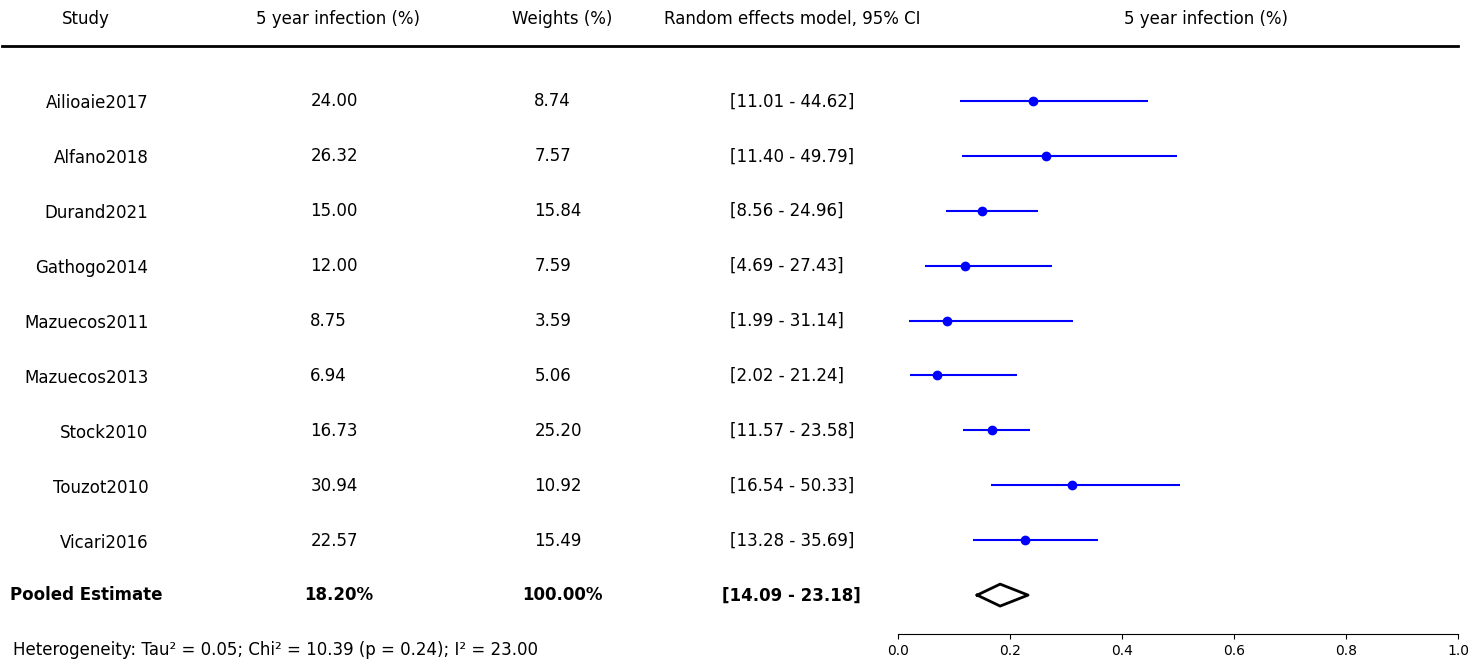

<Figure size 640x480 with 0 Axes>

In [305]:
# Load the JSON data
with open("/mnt/d/pydatascience/hiv_txp_sr/results/5_yr_infection.json", 'r') as f:
    data = json.load(f)

# Extract the necessary data for the forest plot
combined_results = data['combined_results']

studies = [result['study_id'] for result in combined_results[:-1]]  # Exclude 'Pooled Estimate'
effect_sizes = [result['effect_size'] for result in combined_results[:-1]]
lower_ci = [result['ci_lb'] for result in combined_results[:-1]]
upper_ci = [result['ci_ub'] for result in combined_results[:-1]]
weights = [result['weight_percent'] for result in combined_results[:-1]]

# Get the combined OR for the pooled estimate
combined_OR = combined_results[-1]

# Set figure size
fig, ax = plt.subplots(figsize=(7,8))
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# Define the size of the space on the left for the numeric data and on the right for the forest plot
left_space = 0.1
right_space = 0.9
left_limit = -1  # Negative to provide more space for the left numeric data
right_limit = 1  # Less than 1 to limit the forest plot region on the right

# Customize the plot
ax.errorbar(effect_sizes, np.arange(len(studies)), 
            xerr=[np.array(effect_sizes) - np.array(lower_ci), np.array(upper_ci) - np.array(effect_sizes)], 
            fmt='o', color='blue', label='Effect Sizes')
ax.plot([combined_OR['ci_lb'], combined_OR['effect_size'], combined_OR['ci_ub'], combined_OR['effect_size'], combined_OR['ci_lb']], 
        [len(studies), len(studies) - 0.2, len(studies), len(studies) + 0.2, len(studies)], 'k-', linewidth=2, label='95% CI of Pooled Estimate')

# Customize the plot further
ax.set_xlim([0, 1])
ax.set_yticks(np.arange(len(studies)))
ax.get_yaxis().set_tick_params(length=0) 
ax.set_yticklabels(studies,fontsize=12)
ax.yaxis.set_tick_params(pad=540)
ax.invert_yaxis()  # Invert the y-axis to have the first study at the top

# Manually set the axes positions to allow space for the numeric data on the left
pos = ax.get_position()
pos.x0 = left_space
pos.x1 = right_space  
ax.set_position(pos)

# # Annotations and labels
ax.text(-1.45, -1.5, "Study", va='center', ha='center', fontsize=12)
ax.text(-1, - 1.5, "5 year infection (%)", va='center', ha='center', fontsize=12)
ax.text(-0.6, -1.5, "Weights (%)", va='center', ha='center', fontsize=12)
ax.text(-0.19, -1.5, "Random effects model, 95% CI", va='center', ha='center', fontsize=12)
ax.text(0.55, -1.5, "5 year infection (%)", va='center', ha='center', fontsize=12)

# Annotations and labels for study names, events, and weights
for i, study in enumerate(studies):
    ax.text(-1.05, i, f"{effect_sizes[i] * 100:.2f}", verticalalignment='center', horizontalalignment='left', fontsize=12, transform=ax.get_yaxis_transform())
    ax.text(-0.65, i, f"{weights[i]:.2f}", verticalalignment='center', horizontalalignment='left', fontsize=12, transform=ax.get_yaxis_transform())
    ax.text(-0.3, i, f"[{lower_ci[i] * 100:.2f} - {upper_ci[i] * 100:.2f}]", verticalalignment='center', horizontalalignment='left', fontsize=12, transform=ax.get_yaxis_transform())

# Add numeric data of the combined effect
ax.text(-1.45, len(studies), "Pooled Estimate", va='center', ha='center', fontsize=12, fontweight='bold')
ax.text(-1, len(studies), f"{combined_OR['effect_size'] * 100:.2f}%", va='center', ha='center', fontsize=12, fontweight='bold')
ax.text(-0.6, len(studies), f"{combined_OR['weight_percent']:.2f}%", va='center', ha='center', fontsize=12, fontweight='bold')
ax.text(-0.19, len(studies), f"[{combined_OR['ci_lb'] * 100:.2f} - {combined_OR['ci_ub']* 100:.2f}]", va='center', ha='center', fontsize=12, fontweight='bold')

# Add annotation of Heterogeneity, overall effect
ax.text(-1.58, len(studies) + 1, f"Heterogeneity: Tau² = {data['tau2']:.2f}; Chi² = {data['Q']:.2f} (p = {data['p_value_for_Q']:.2f}); I² = {data['I2']:.2f}", va='center', ha='left', fontsize=12)
# ax.text(-0.2, 5, f"Test for overall effect: Z = {summary_df['Value'].iloc[5]} (p = {summary_df['Value'].iloc[6]})", va='center', ha='left', fontsize=12)

# Draw the long horizontal line
axhline = plt.axhline(y=-1, color='black', linestyle='-', lw=2)
axhline.set_clip_on(False)
axhline.set_xdata([left_limit - 0.6, right_limit])

# Show the plot
plt.show()
plt.savefig('/mnt/d/pydatascience/hiv_txp_sr/results/5_yr_infection.png', dpi=1000)

### Hazard Ratio